In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
from PIL import Image
import os
import torch.optim as optim

from data_utils import WildfireRowDatasetV2


# 학습 및 평가 함수
def train_test_split_dataset(dataset, test_ratio=0.2,seed=42):
    test_size = int(len(dataset) * test_ratio)
    train_size = len(dataset) - test_size
    return random_split(dataset, [train_size, test_size], generator=torch.Generator().manual_seed(seed))

def train(model, dataloader, criterion, optimizer, device):
    
    model.train()
    total_loss = 0.0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        # print("Inputs:", inputs.min().item(), inputs.max().item())
        # print("Output:", outputs.min().item(), outputs.max().item())
        # print("Label :", labels.min().item(), labels.max().item())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)

    avg_loss = total_loss / len(dataloader.dataset)
    return avg_loss

def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item() * inputs.size(0)

    avg_loss = total_loss / len(dataloader.dataset)
    return avg_loss

def run_training_pipeline(csv_path, image_path, img_size, model, model_path="", batch_size=4, lr=1e-3, epochs=5, test_ratio=0.2):
    
    train_losses = []
    test_losses = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    dataset = WildfireRowDatasetV2(csv_path, image_path, img_size=img_size)
    train_set, test_set = train_test_split_dataset(dataset, test_ratio=test_ratio)
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

    model = model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    min_test_loss = float('inf')
    for epoch in range(1, epochs + 1):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        test_loss = evaluate(model, test_loader, criterion, device)
        if test_loss < min_test_loss:
            min_test_loss = test_loss
            torch.save(model.state_dict(), f"{model_path}/model_best.pth")
            print(f"Best model (epoch {epoch}) saved to {model_path}/model_best.pth")
        
        
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")
        train_losses.append(train_loss)
        test_losses.append(test_loss) 
        
    torch.save(model.state_dict(), f"{model_path}/model_last_epoch{epoch}.pth")
    print(f"model saved to {model_path}/model_last_epoch{epoch}.pth")
    
    with open(f"{model_path}/train_losses.csv", "w") as f:
        for loss in train_losses:
            f.write(f"{loss}\n")
    with open(f"{model_path}/test_losses.csv", "w") as f:
        for loss in test_losses:
            f.write(f"{loss}\n")
    
    return train_losses, test_losses


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

prev_img = Image.open("data/firemask_output/grid_2019-04-06_lon128.88514_lat35.02703.png").convert("L")#.resize((128, 128))

plt.imshow(prev_img, cmap='gray')  # 흑백이면 cmap='gray' 추가
plt.axis('off')               # 축 제거
plt.show()

prev_img = Image.open("data/firemask_output/grid_2019-04-06_lon128.88514_lat35.02703.png").convert("L").resize((128, 128))

plt.imshow(prev_img, cmap='gray')  # 흑백이면 cmap='gray' 추가
plt.axis('off')               # 축 제거
plt.show()

prev_img = Image.open("data/firemask_output/grid_2019-04-06_lon128.88514_lat35.02703.png").convert("L").resize((256, 256))

plt.imshow(prev_img, cmap='gray')  # 흑백이면 cmap='gray' 추가
plt.axis('off')               # 축 제거
plt.show()

Hyperparameters: [[[32, 64], [64, 32], [3, 3, 3, 3, 3], 128], [[32, 64, 128], [128, 64, 32], [3, 3, 3, 3, 3, 3, 3], 128], [[32, 64, 128], [128, 64, 32], [7, 5, 3, 3, 3, 5, 7], 256], [[32, 64, 128, 256], [256, 128, 64, 32], [3, 3, 3, 3, 3, 3, 3, 3, 3], 128]]
Using device: cuda
Best model (epoch 1) saved to 0715_1/model_best.pth
Epoch 1: Train Loss = 0.3850, Test Loss = 0.2369
Best model (epoch 2) saved to 0715_1/model_best.pth
Epoch 2: Train Loss = 0.0796, Test Loss = 0.0431
Best model (epoch 3) saved to 0715_1/model_best.pth
Epoch 3: Train Loss = 0.0371, Test Loss = 0.0312
Best model (epoch 4) saved to 0715_1/model_best.pth
Epoch 4: Train Loss = 0.0289, Test Loss = 0.0269
Best model (epoch 5) saved to 0715_1/model_best.pth
Epoch 5: Train Loss = 0.0269, Test Loss = 0.0244
Epoch 6: Train Loss = 0.0258, Test Loss = 0.0245
Best model (epoch 7) saved to 0715_1/model_best.pth
Epoch 7: Train Loss = 0.0253, Test Loss = 0.0237
Best model (epoch 8) saved to 0715_1/model_best.pth
Epoch 8: Train L

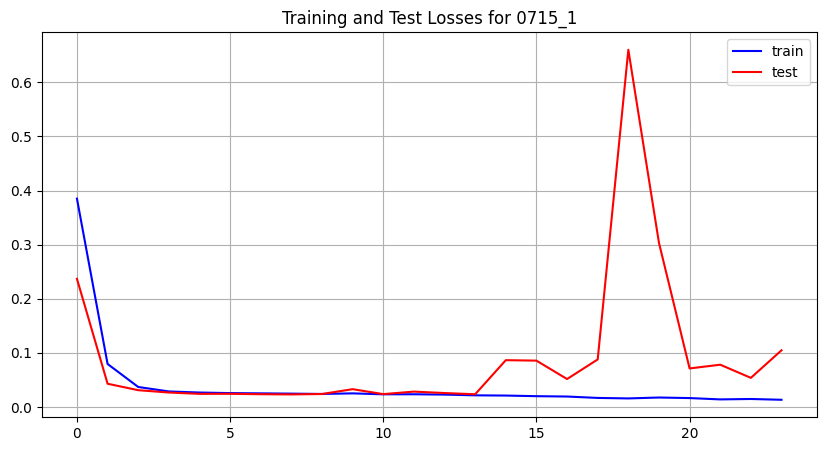

Training completed.
Using device: cuda
Best model (epoch 1) saved to 0715_2/model_best.pth
Epoch 1: Train Loss = 0.1946, Test Loss = 0.0598
Best model (epoch 2) saved to 0715_2/model_best.pth
Epoch 2: Train Loss = 0.0448, Test Loss = 0.0428
Best model (epoch 3) saved to 0715_2/model_best.pth
Epoch 3: Train Loss = 0.0297, Test Loss = 0.0255
Best model (epoch 4) saved to 0715_2/model_best.pth
Epoch 4: Train Loss = 0.0271, Test Loss = 0.0252
Epoch 5: Train Loss = 0.0265, Test Loss = 0.0260
Epoch 6: Train Loss = 0.0260, Test Loss = 0.0253
Best model (epoch 7) saved to 0715_2/model_best.pth
Epoch 7: Train Loss = 0.0257, Test Loss = 0.0223
Epoch 8: Train Loss = 0.0258, Test Loss = 0.0289
Epoch 9: Train Loss = 0.0260, Test Loss = 0.0310
Epoch 10: Train Loss = 0.0261, Test Loss = 0.0432
Epoch 11: Train Loss = 0.0256, Test Loss = 0.0294
Epoch 12: Train Loss = 0.0245, Test Loss = 0.0300
Epoch 13: Train Loss = 0.0234, Test Loss = 0.0253
Epoch 14: Train Loss = 0.0218, Test Loss = 0.3154
Epoch 15: 

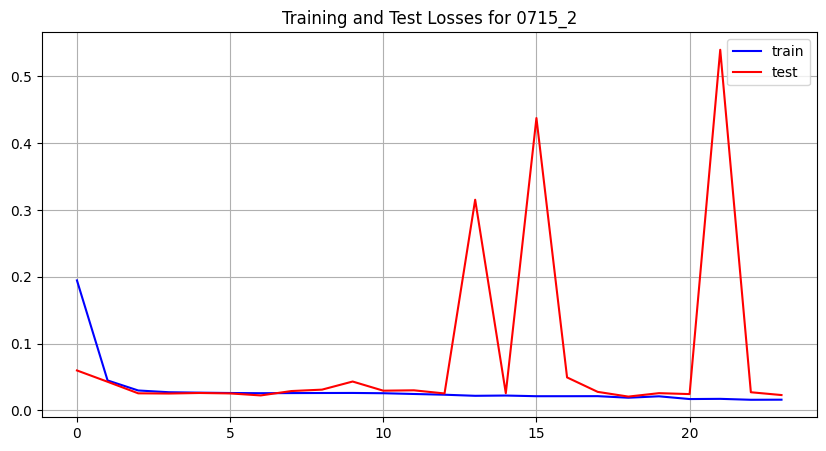

Training completed.
Using device: cuda
Best model (epoch 1) saved to 0715_3/model_best.pth
Epoch 1: Train Loss = 0.2625, Test Loss = 0.0887
Best model (epoch 2) saved to 0715_3/model_best.pth
Epoch 2: Train Loss = 0.0539, Test Loss = 0.0359
Best model (epoch 3) saved to 0715_3/model_best.pth
Epoch 3: Train Loss = 0.0320, Test Loss = 0.0280
Best model (epoch 4) saved to 0715_3/model_best.pth
Epoch 4: Train Loss = 0.0289, Test Loss = 0.0254
Best model (epoch 5) saved to 0715_3/model_best.pth
Epoch 5: Train Loss = 0.0270, Test Loss = 0.0246
Best model (epoch 6) saved to 0715_3/model_best.pth
Epoch 6: Train Loss = 0.0267, Test Loss = 0.0243
Epoch 7: Train Loss = 0.0267, Test Loss = 0.0313
Epoch 8: Train Loss = 0.0268, Test Loss = 0.0247
Best model (epoch 9) saved to 0715_3/model_best.pth
Epoch 9: Train Loss = 0.0266, Test Loss = 0.0240
Epoch 10: Train Loss = 0.0264, Test Loss = 0.0297
Epoch 11: Train Loss = 0.0266, Test Loss = 0.0241
Epoch 12: Train Loss = 0.0261, Test Loss = 0.0318
Epoch 

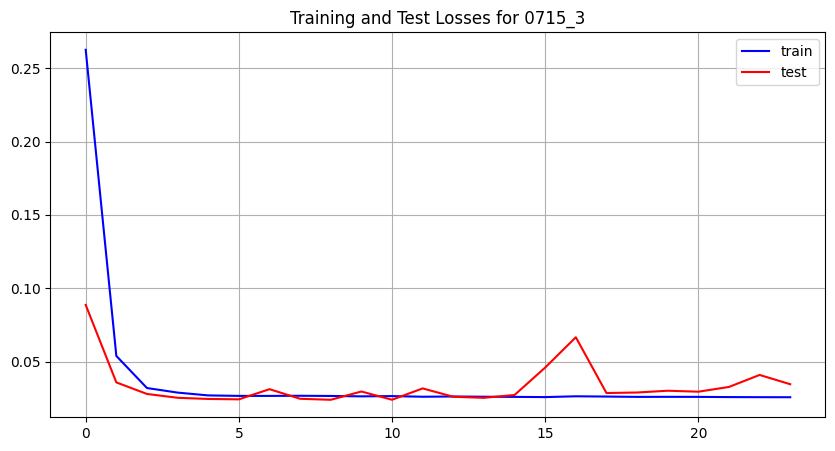

Training completed.
Using device: cuda
Best model (epoch 1) saved to 0715_4/model_best.pth
Epoch 1: Train Loss = 0.2119, Test Loss = 0.0658
Best model (epoch 2) saved to 0715_4/model_best.pth
Epoch 2: Train Loss = 0.0467, Test Loss = 0.0322
Best model (epoch 3) saved to 0715_4/model_best.pth
Epoch 3: Train Loss = 0.0300, Test Loss = 0.0258
Best model (epoch 4) saved to 0715_4/model_best.pth
Epoch 4: Train Loss = 0.0269, Test Loss = 0.0248
Best model (epoch 5) saved to 0715_4/model_best.pth
Epoch 5: Train Loss = 0.0260, Test Loss = 0.0235
Best model (epoch 6) saved to 0715_4/model_best.pth
Epoch 6: Train Loss = 0.0257, Test Loss = 0.0234
Epoch 7: Train Loss = 0.0256, Test Loss = 0.0240
Best model (epoch 8) saved to 0715_4/model_best.pth
Epoch 8: Train Loss = 0.0254, Test Loss = 0.0216
Epoch 9: Train Loss = 0.0255, Test Loss = 0.0226
Best model (epoch 10) saved to 0715_4/model_best.pth
Epoch 10: Train Loss = 0.0247, Test Loss = 0.0207
Epoch 11: Train Loss = 0.0237, Test Loss = 0.0409
Epo

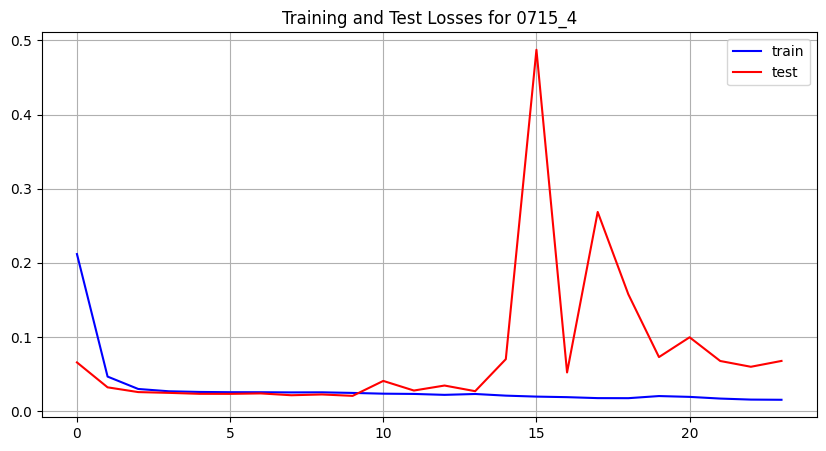

Training completed.


In [ ]:
from model import UNet
from data_utils import WildfireRowDatasetV2
import matplotlib.pyplot as plt

encoder_channels_list = [[32, 64], [32, 64, 128],[32, 64, 128], [32, 64, 128, 256]]
decoder_channels_list = [[64, 32], [128, 64, 32],[128, 64, 32], [256, 128, 64, 32]]
kernel_sizes = [[3,3,3,3,3],[3,3,3,3,3,3,3],[7,5,3,3,3,5,7],[3,3,3,3,3,3,3,3,3]]
img_size = [128,128,256,128]
save_paths = ['0715_1','0715_2','0715_3','0715_4']

hyperparams = [[encoder_channels_list[i], decoder_channels_list[i], kernel_sizes[i], img_size[i]] for i in range(0,4)]
print("Hyperparameters:", hyperparams)

for i in range(0,4):
    
    with open(save_paths[i]+'/info.txt', "w") as log_file:
        log_file.write(hyperparams[i].__str__())

    model = UNet(
        input_channels=16,
        encoder_channels=hyperparams[i][0],
        decoder_channels=hyperparams[i][1],
        kernel_sizes=hyperparams[i][2],
    )

    train_losses, test_losses = run_training_pipeline(
        csv_path="data/firemask_modis_wind_weather_end_2day.csv",
        image_path="data",
        img_size=hyperparams[i][3],
        model=model,
        model_path=save_paths[i],
        batch_size=4,
        lr=1e-3,
        epochs=24,
        test_ratio=0.2
    )
    
    plt.figure(figsize=(10,5))
    plt.grid(True)
    plt.plot(train_losses,label='train',color='b')
    plt.plot(test_losses,label='test',color='r')
    plt.title(f"Training and Test Losses for {save_paths[i]}")
    plt.legend()
    plt.show()

    print("Training completed.")


Hyperparameters: [[[32, 64, 128], [128, 64, 32], [3, 3, 3, 5, 3, 3, 3], 128], [[64, 128, 256], [256, 128, 64], [3, 3, 3, 7, 3, 3, 3], 256], [[32, 64, 128, 256], [256, 128, 64, 32], [3, 3, 3, 5, 7, 5, 3, 3, 3], 256], [[32, 64, 128, 256], [256, 128, 64, 32], [7, 3, 3, 5, 7, 5, 3, 3, 7], 256]]
Using device: cuda
Best model (epoch 1) saved to 0715_5/model_best.pth
Epoch 1: Train Loss = 0.2591, Test Loss = 0.0938
Best model (epoch 2) saved to 0715_5/model_best.pth
Epoch 2: Train Loss = 0.0520, Test Loss = 0.0343
Best model (epoch 3) saved to 0715_5/model_best.pth
Epoch 3: Train Loss = 0.0314, Test Loss = 0.0273
Best model (epoch 4) saved to 0715_5/model_best.pth
Epoch 4: Train Loss = 0.0273, Test Loss = 0.0246
Epoch 5: Train Loss = 0.0260, Test Loss = 0.0260
Epoch 6: Train Loss = 0.0269, Test Loss = 0.0287
Epoch 7: Train Loss = 0.0262, Test Loss = 0.0247
Epoch 8: Train Loss = 0.0252, Test Loss = 0.0479
Best model (epoch 9) saved to 0715_5/model_best.pth
Epoch 9: Train Loss = 0.0255, Test Lo

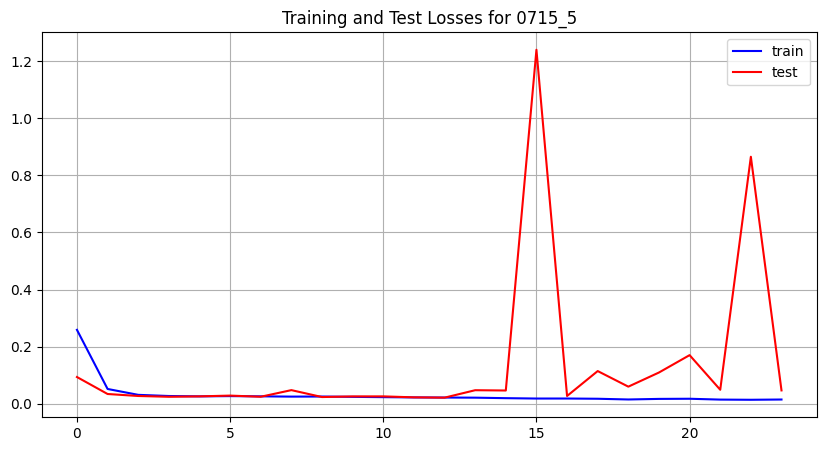

Training completed.
Using device: cuda
Best model (epoch 1) saved to 0715_6/model_best.pth
Epoch 1: Train Loss = 0.1372, Test Loss = 0.0380
Best model (epoch 2) saved to 0715_6/model_best.pth
Epoch 2: Train Loss = 0.0310, Test Loss = 0.0247
Epoch 3: Train Loss = 0.0276, Test Loss = 0.0473
Epoch 4: Train Loss = 0.0267, Test Loss = 0.0285
Epoch 5: Train Loss = 0.0266, Test Loss = 0.0357
Best model (epoch 6) saved to 0715_6/model_best.pth
Epoch 6: Train Loss = 0.0262, Test Loss = 0.0223
Epoch 7: Train Loss = 0.0258, Test Loss = 0.0235
Epoch 8: Train Loss = 0.0264, Test Loss = 0.0303
Epoch 9: Train Loss = 0.0262, Test Loss = 0.0233
Epoch 10: Train Loss = 0.0257, Test Loss = 0.0319
Epoch 11: Train Loss = 0.0250, Test Loss = 0.0337
Epoch 12: Train Loss = 0.0243, Test Loss = 0.0475
Epoch 13: Train Loss = 0.0234, Test Loss = 0.0506
Epoch 14: Train Loss = 0.0228, Test Loss = 0.0594
Epoch 15: Train Loss = 0.0223, Test Loss = 0.0630
Epoch 16: Train Loss = 0.0215, Test Loss = 0.0548
Epoch 17: Trai

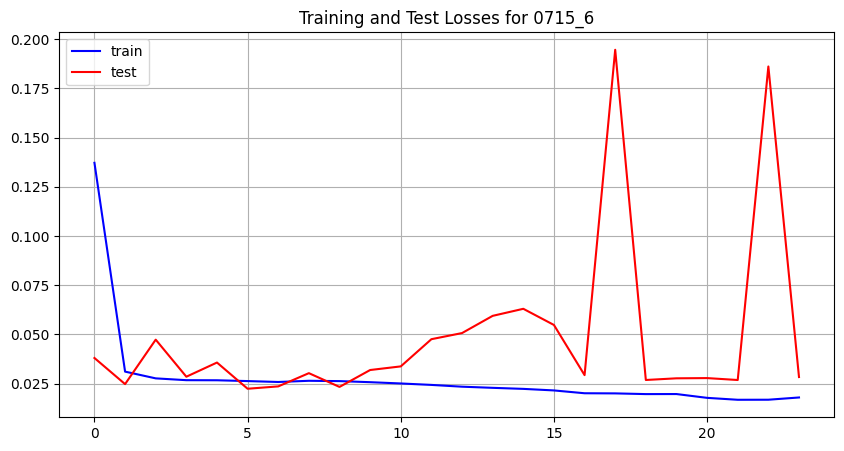

Training completed.
Using device: cuda
Best model (epoch 1) saved to 0715_7/model_best.pth
Epoch 1: Train Loss = 0.2319, Test Loss = 0.0815
Best model (epoch 2) saved to 0715_7/model_best.pth
Epoch 2: Train Loss = 0.0529, Test Loss = 0.0413
Epoch 3: Train Loss = 0.0322, Test Loss = 0.0526
Best model (epoch 4) saved to 0715_7/model_best.pth
Epoch 4: Train Loss = 0.0283, Test Loss = 0.0260
Best model (epoch 5) saved to 0715_7/model_best.pth
Epoch 5: Train Loss = 0.0269, Test Loss = 0.0245
Best model (epoch 6) saved to 0715_7/model_best.pth
Epoch 6: Train Loss = 0.0263, Test Loss = 0.0244
Epoch 7: Train Loss = 0.0266, Test Loss = 0.0256
Epoch 8: Train Loss = 0.0261, Test Loss = 0.0246
Epoch 9: Train Loss = 0.0260, Test Loss = 0.0251
Epoch 10: Train Loss = 0.0249, Test Loss = 0.0358
Epoch 11: Train Loss = 0.0247, Test Loss = 0.0253
Epoch 12: Train Loss = 0.0240, Test Loss = 0.0290
Epoch 13: Train Loss = 0.0216, Test Loss = 0.0324
Epoch 14: Train Loss = 0.0199, Test Loss = 0.0358
Epoch 15: 

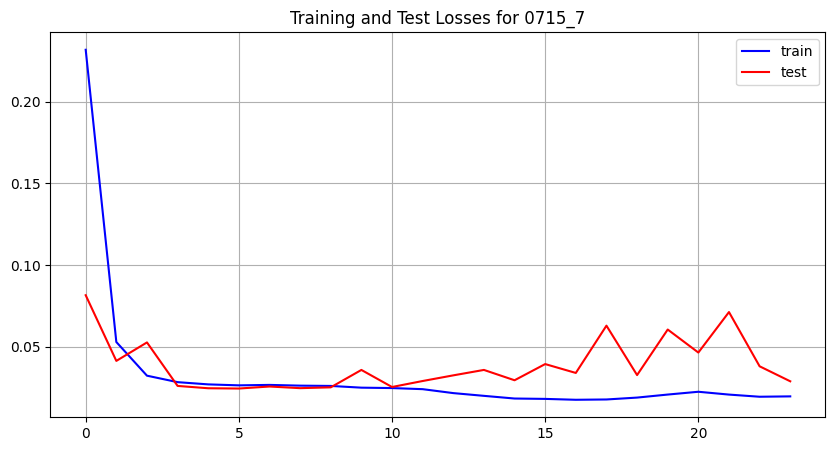

Training completed.
Using device: cuda
Best model (epoch 1) saved to 0715_8/model_best.pth
Epoch 1: Train Loss = 0.2483, Test Loss = 0.1003
Best model (epoch 2) saved to 0715_8/model_best.pth
Epoch 2: Train Loss = 0.0590, Test Loss = 0.0401
Best model (epoch 3) saved to 0715_8/model_best.pth
Epoch 3: Train Loss = 0.0333, Test Loss = 0.0271
Best model (epoch 4) saved to 0715_8/model_best.pth
Epoch 4: Train Loss = 0.0282, Test Loss = 0.0258
Best model (epoch 5) saved to 0715_8/model_best.pth
Epoch 5: Train Loss = 0.0272, Test Loss = 0.0243
Epoch 6: Train Loss = 0.0269, Test Loss = 0.0345
Epoch 7: Train Loss = 0.0274, Test Loss = 0.0257
Epoch 8: Train Loss = 0.0268, Test Loss = 0.0246
Epoch 9: Train Loss = 0.0265, Test Loss = 0.0288
Best model (epoch 10) saved to 0715_8/model_best.pth
Epoch 10: Train Loss = 0.0266, Test Loss = 0.0232
Epoch 11: Train Loss = 0.0264, Test Loss = 0.0677
Best model (epoch 12) saved to 0715_8/model_best.pth
Epoch 12: Train Loss = 0.0259, Test Loss = 0.0230
Epoc

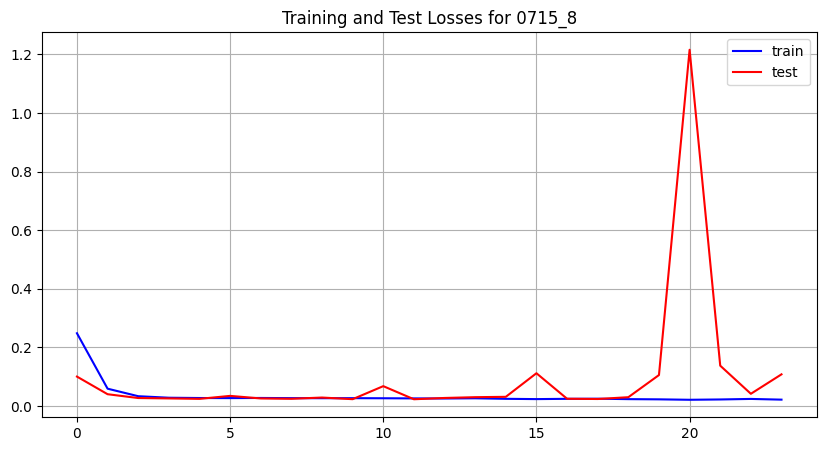

Training completed.


In [2]:
from model import UNet
from data_utils import WildfireRowDatasetV2
import matplotlib.pyplot as plt

encoder_channels_list = [[32, 64, 128],[64, 128,256], [32, 64, 128, 256], [32, 64, 128, 256]]
decoder_channels_list = [[128, 64, 32],[256,128, 64], [256, 128, 64, 32], [256, 128, 64, 32]]
kernel_sizes = [[3,3,3,5,3,3,3],[3,3,3,7,3,3,3],[3,3,3,5,7,5,3,3,3],[7,3,3,5,7,5,3,3,7]]
img_size = [128,256,256,256]
save_paths = ['0715_5','0715_6','0715_7','0715_8']

hyperparams = [[encoder_channels_list[i], decoder_channels_list[i], kernel_sizes[i], img_size[i]] for i in range(0,4)]
print("Hyperparameters:", hyperparams)

for i in range(0,4):
    
    with open(save_paths[i]+'/info.txt', "w") as log_file:
        log_file.write(hyperparams[i].__str__())

    model = UNet(
        input_channels=16,
        encoder_channels=hyperparams[i][0],
        decoder_channels=hyperparams[i][1],
        kernel_sizes=hyperparams[i][2],
    )

    train_losses, test_losses = run_training_pipeline(
        csv_path="data/firemask_modis_wind_weather_end_2day.csv",
        image_path="data",
        img_size=hyperparams[i][3],
        model=model,
        model_path=save_paths[i],
        batch_size=4,
        lr=1e-3,
        epochs=24,
        test_ratio=0.2
    )
    
    plt.figure(figsize=(10,5))
    plt.grid(True)
    plt.plot(train_losses,label='train',color='b')
    plt.plot(test_losses,label='test',color='r')
    plt.title(f"Training and Test Losses for {save_paths[i]}")
    plt.legend()
    plt.show()

    print("Training completed.")


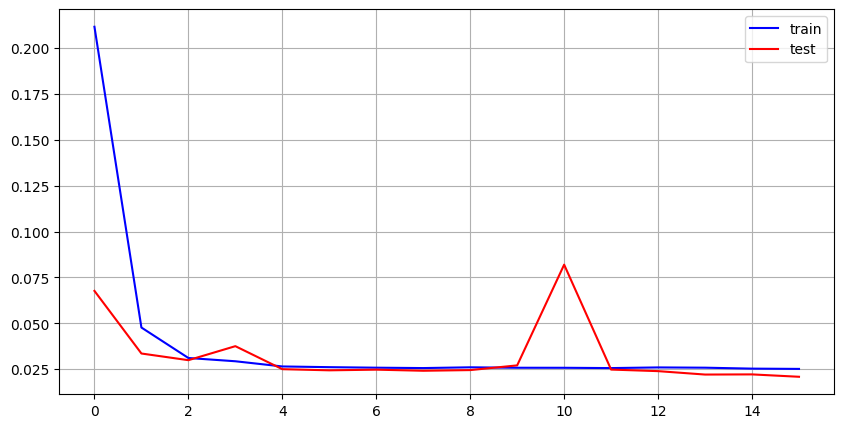

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(train_losses,label='train',color='b')
plt.plot(test_losses,label='test',color='r')
plt.legend()
plt.show()

In [ ]:
model.load_state_dict(torch.load("model_checkpoint.pth"))
model.eval()  # 추론 모드로 전환

In [ ]:
# grid search
#model params
img_sizes = [128,256]